**Arboles de Decisión**

In [1]:
#Importar las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

Primeras filas del conjunto de datos:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1   

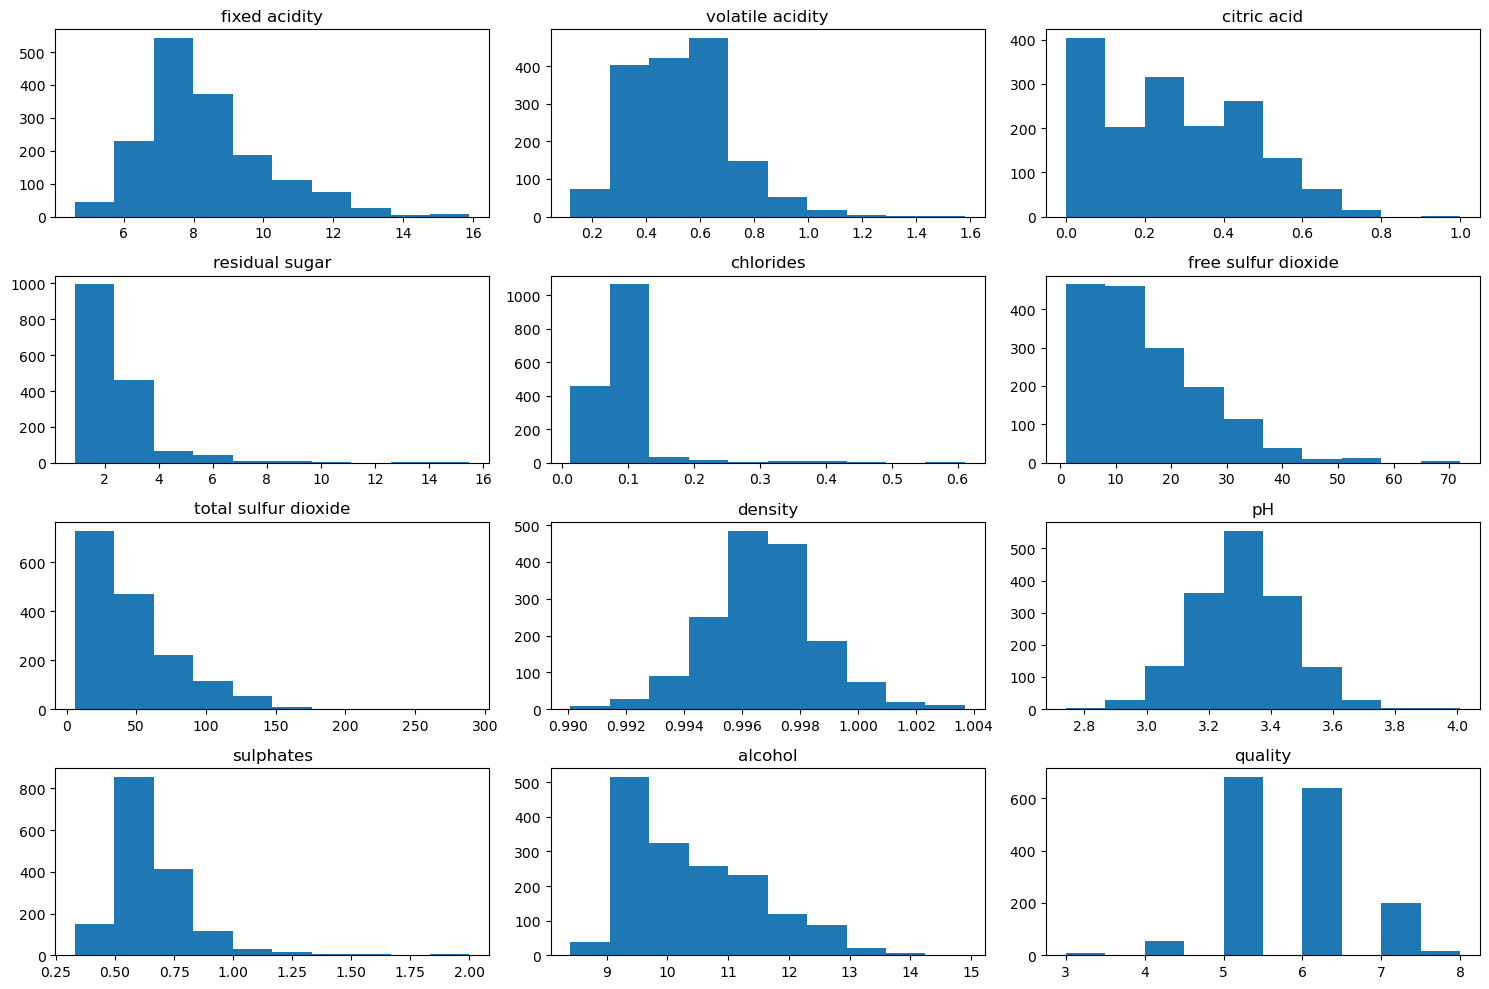


Diagramas de caja para cada característica:


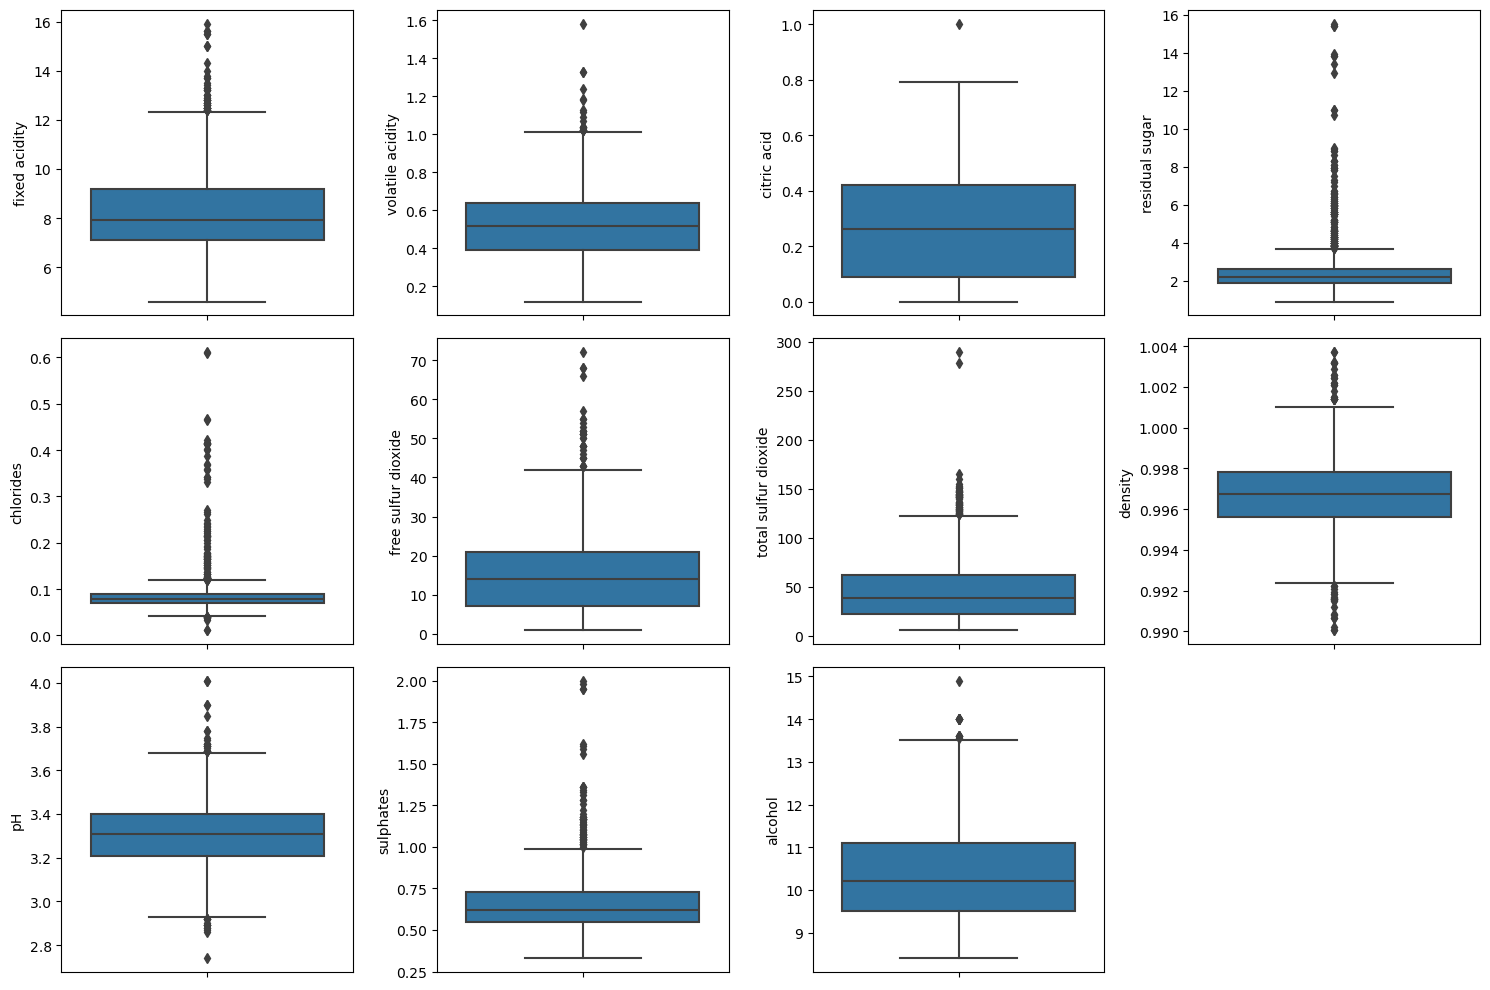


Mapa de calor de las correlaciones entre variables:


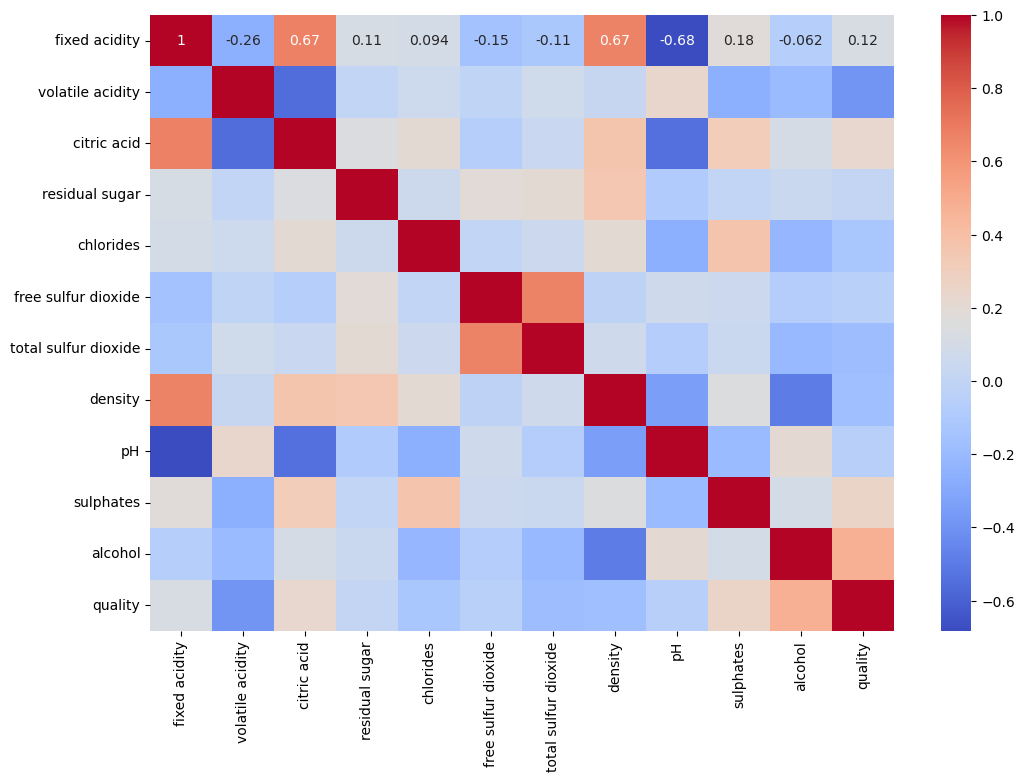

In [2]:
# Cargar los datos
data = pd.read_csv("winequality-red.csv")

# Mostrar las primeras filas del conjunto de datos para una inspección inicial
print("Primeras filas del conjunto de datos:")
print(data.head())

# Dimensiones del conjunto de datos
print("\nDimensiones del conjunto de datos:")
print(data.shape)

# Estadísticas descriptivas del conjunto de datos
print("\nEstadísticas descriptivas del conjunto de datos:")
print(data.describe())

# Revisión de valores nulos
print("\nRevisión de valores nulos en el conjunto de datos:")
print(data.isnull().sum())

# Histogramas para cada característica para visualizar las distribuciones
print("\nHistogramas para cada característica:")
data.hist(bins=10, figsize=(15, 10), grid=False)
plt.tight_layout()
plt.show()

# Diagramas de caja para identificar valores atípicos
print("\nDiagramas de caja para cada característica:")
plt.figure(figsize=(15, 10))
for index, column in enumerate(data.columns[:-1]):  # Excluir la columna 'quality'
    plt.subplot(3, 4, index + 1)
    sns.boxplot(y=column, data=data)
plt.tight_layout()
plt.show()

# Mapa de calor para las correlaciones entre variables
print("\nMapa de calor de las correlaciones entre variables:")
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

**Con la anterior ejecución podemos concluir**
-El conjunto de datos tiene 1599 filas y 12 columnas.
-Las estadísticas descriptivas indican, por ejemplo, que el promedio de alcohol es de aproximadamente 10.42%, y la calidad media es de 5.63.
-No hay valores nulos en el conjunto de datos, lo cual es excelente para los próximos pasos de procesamiento.


**Los gráficos que hemos generado muestran lo siguiente**:

Los histogramas nos proporcionan una visión de la distribución de cada variable. podemos ver que la variable 'alcohol' tiene una distribución ligeramente sesgada hacia la derecha.

Los diagramas de caja resaltan los posibles valores atípicos en los datos. Algunas variables como 'residual sugar', 'free sulfur dioxide' y 'total sulfur dioxide' muestran varios valores que se consideran atípicos.

El mapa de calor de correlaciones nos indica cómo cada variable se relaciona con las demás. Por ejemplo, hay una correlación positiva moderada entre 'fixed acidity' y 'citric acid', y una correlación negativa entre 'volatile acidity' y 'quality', sugiriendo que a mayor acidez volátil podría haber una calidad más baja.

In [3]:
# Paso 2: Preprocesamiento de los datos

# Eliminar duplicados si los hay
print(f"Número de filas antes de eliminar duplicados: {data.shape[0]}")
data.drop_duplicates(inplace=True)
print(f"Número de filas después de eliminar duplicados: {data.shape[0]}")

# Mostrar las primeras filas después del preprocesamiento
print("\nPrimeras filas después del preprocesamiento:")
print(data.head())

Número de filas antes de eliminar duplicados: 1599
Número de filas después de eliminar duplicados: 1359

Primeras filas después del preprocesamiento:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5          

In [81]:
# Paso 3: Selección de Características

# Preparar los datos para la selección de características
X = data.drop('quality', axis=1)  # Características
y = data['quality']  # Variable objetivo

# Entrenar un árbol de decisión para obtener la importancia de las características
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X, y)

# Obtener la importancia de las características y ordenarlas
feature_importances = pd.DataFrame(tree_clf.feature_importances_,
                                   index=X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

print("Importancia de las características:")
print(feature_importances)

# Seleccionar las características más importantes según el criterio elegido el cual es 0.05 para este caso
selected_features = feature_importances[feature_importances['importance'] > 0.03].index
print("\nCaracterísticas seleccionadas:")
print(selected_features)

# Ahora, se crea un nuevo DataFrame con las características seleccionadas para el respectivo analisis
X_selected = X[selected_features]
print("\nPrimeras filas con características seleccionadas:")
print(X_selected.head())

Importancia de las características:
                      importance
alcohol                 0.181336
sulphates               0.119036
volatile acidity        0.113003
total sulfur dioxide    0.110035
chlorides               0.084573
pH                      0.074990
free sulfur dioxide     0.068043
density                 0.066551
fixed acidity           0.064328
citric acid             0.061729
residual sugar          0.056376

Características seleccionadas:
Index(['alcohol', 'sulphates', 'volatile acidity', 'total sulfur dioxide',
       'chlorides', 'pH', 'free sulfur dioxide', 'density', 'fixed acidity',
       'citric acid', 'residual sugar'],
      dtype='object')

Primeras filas con características seleccionadas:
   alcohol  sulphates  volatile acidity  total sulfur dioxide  chlorides  \
0      9.4       0.56              0.70                  34.0      0.076   
1      9.8       0.68              0.88                  67.0      0.098   
2      9.8       0.65              0.76   

In [82]:
#4 Dividir los datos en entrenamiento y prueba usando las características seleccionadas y el objetivo
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=13)

In [83]:
tree = DecisionTreeClassifier()


In [84]:
arbol = tree.fit(X_train, y_train)


[Text(0.47569074744463374, 0.975, 'x[0] <= 9.925\ngini = 0.651\nsamples = 1087\nvalue = [7, 44, 461, 423, 137, 15]'),
 Text(0.252222636286201, 0.925, 'x[3] <= 98.5\ngini = 0.482\nsamples = 445\nvalue = [4, 21, 298, 115, 6, 1]'),
 Text(0.17735839011925042, 0.875, 'x[8] <= 10.05\ngini = 0.523\nsamples = 375\nvalue = [4, 20, 233, 111, 6, 1]'),
 Text(0.08640332197614992, 0.825, 'x[5] <= 3.205\ngini = 0.492\nsamples = 336\nvalue = [2, 16, 220, 93, 5, 0]'),
 Text(0.020442930153321975, 0.775, 'x[0] <= 9.15\ngini = 0.266\nsamples = 76\nvalue = [0, 0, 64, 12, 0, 0]'),
 Text(0.013628620102214651, 0.725, 'x[3] <= 79.5\ngini = 0.494\nsamples = 9\nvalue = [0, 0, 5, 4, 0, 0]'),
 Text(0.010221465076660987, 0.675, 'x[0] <= 9.05\ngini = 0.32\nsamples = 5\nvalue = [0, 0, 1, 4, 0, 0]'),
 Text(0.0068143100511073255, 0.625, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]'),
 Text(0.013628620102214651, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 0, 4, 0, 0]'),
 Text(0.017035775127768313, 0.675, 'gi

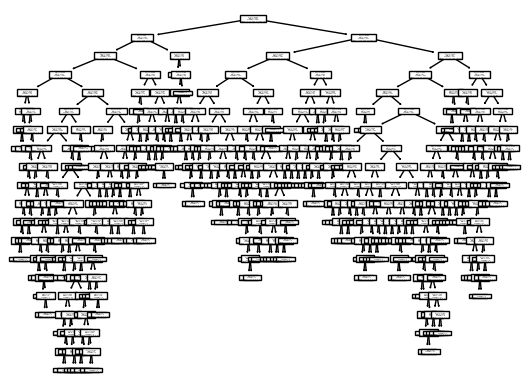

In [85]:
plot_tree(arbol)

In [86]:
# 5 Entrenar el Modelo
from sklearn.tree import DecisionTreeClassifier

# Inicializar el modelo de árbol de decisión con hiperparámetros específicos
# Los hiperparámetros se ajustan para obtener el mejor rendimiento posible
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=13)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

[Text(0.47569074744463374, 0.975, 'x[0] <= 9.925\ngini = 0.651\nsamples = 1087\nvalue = [7, 44, 461, 423, 137, 15]'),
 Text(0.252222636286201, 0.925, 'x[3] <= 98.5\ngini = 0.482\nsamples = 445\nvalue = [4, 21, 298, 115, 6, 1]'),
 Text(0.17735839011925042, 0.875, 'x[8] <= 10.05\ngini = 0.523\nsamples = 375\nvalue = [4, 20, 233, 111, 6, 1]'),
 Text(0.08640332197614992, 0.825, 'x[5] <= 3.205\ngini = 0.492\nsamples = 336\nvalue = [2, 16, 220, 93, 5, 0]'),
 Text(0.020442930153321975, 0.775, 'x[0] <= 9.15\ngini = 0.266\nsamples = 76\nvalue = [0, 0, 64, 12, 0, 0]'),
 Text(0.013628620102214651, 0.725, 'x[3] <= 79.5\ngini = 0.494\nsamples = 9\nvalue = [0, 0, 5, 4, 0, 0]'),
 Text(0.010221465076660987, 0.675, 'x[0] <= 9.05\ngini = 0.32\nsamples = 5\nvalue = [0, 0, 1, 4, 0, 0]'),
 Text(0.0068143100511073255, 0.625, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]'),
 Text(0.013628620102214651, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 0, 4, 0, 0]'),
 Text(0.017035775127768313, 0.675, 'gi

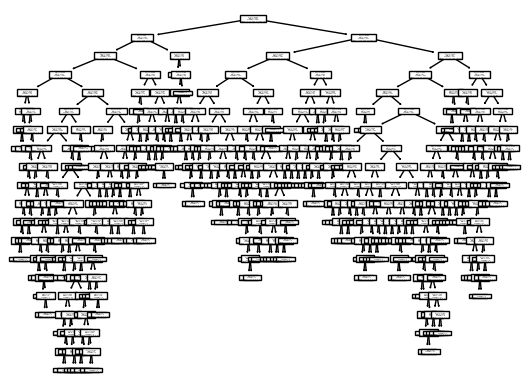

In [87]:
plot_tree(arbol)

In [88]:
precciones

array([6, 6, 7, 4, 6, 6, 6, 5, 5, 6, 5, 5, 6, 7, 6, 5, 5, 5, 5, 6, 6, 6,
       5, 7, 6, 5, 5, 6, 6, 5, 6, 5, 4, 5, 6, 6, 5, 5, 6, 5, 6, 6, 5, 6,
       6, 5, 5, 5, 6, 6, 3, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 8, 5, 5, 6, 4,
       5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 5, 5, 5, 4, 5, 4, 6, 5, 6, 6, 5, 7,
       5, 7, 6, 5, 5, 5, 6, 5, 6, 8, 6, 4, 5, 5, 6, 7, 8, 6, 7, 5, 5, 5,
       5, 6, 5, 6, 6, 5, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 7, 6, 7, 5, 7,
       5, 5, 7, 7, 6, 6, 5, 5, 5, 7, 6, 5, 6, 6, 5, 5, 5, 4, 4, 5, 5, 6,
       5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 8, 4, 6, 6, 5, 6, 5, 4, 5, 5,
       6, 5, 6, 7, 8, 5, 5, 6, 5, 7, 7, 5, 6, 7, 7, 6, 4, 7, 5, 6, 6, 5,
       5, 5, 6, 6, 5, 5, 6, 7, 6, 6, 5, 7, 6, 5, 5, 5, 5, 5, 6, 5, 7, 6,
       4, 6, 7, 5, 6, 6, 8, 7, 5, 7, 6, 5, 6, 6, 5, 6, 5, 5, 5, 7, 6, 6,
       6, 6, 6, 7, 7, 7, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 7,
       5, 5, 7, 6, 5, 5, 5, 5], dtype=int64)

In [94]:
#6 Evalua el Desempeño del Modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predicciones en el conjunto de prueba
y_pred = tree_clf.predict(X_test)

# Cálculo de métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.5625
Recall: 0.5625
F1 Score: 0.5145128917708817


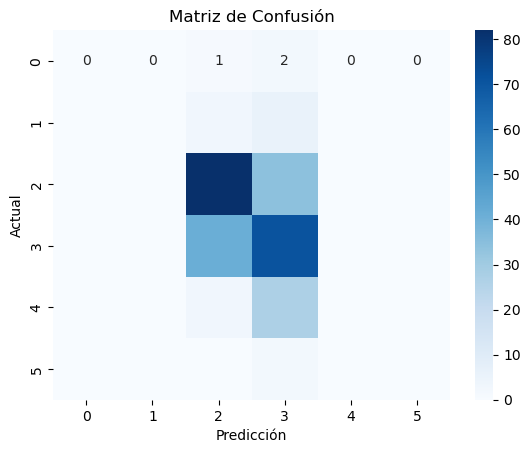

In [90]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)

# Visualización de la matriz de confusión con Seaborn
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión')
plt.show()

In [91]:
accuracy = accuracy_score(y_test,precciones)
accuracy

0.5073529411764706